In [48]:
import pandas as pd

In [49]:
import numpy as np

In [50]:
f = pd.read_pickle('../data/interim/job_description_features')

In [51]:
f.head(1)

,job_title,job_description,rating,company_name,headquarters,size,founded,type_of_ownership,industry,sector,...,lead,principal,director,python,sql,aws,spark,r,tableau,excel
0,"data analyst, center on immigration and justic...",are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,...,0,0,0,1,1,1,0,0,0,0


Fix size and revenue into ordinal numbers and change founded to age and give ordinals there as well

In [52]:
size_dict = {'1 to 50 employees':1,
 '51 to 200 employees':2, 
 '201 to 500 employees':3, 
 '501 to 1000 employees':4,
 '1001 to 5000 employees':5, 
 '5001 to 10000 employees':6,  
 '10000+ employees':7,
 'Unknown':np.nan, 
 '-1':np.nan}

In [53]:
f['size_ord'] = f['size'].apply(lambda x: size_dict[x])

In [54]:
f['age'] = f['founded'].apply(lambda x: np.nan if x==-1 else 2020-x)

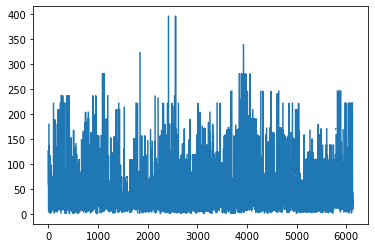

In [55]:
f['age'].plot()

In [56]:
def get_age_ord(x):
    if x<50:
        return 1
    elif x<100:
        return 2
    elif x<150:
        return 3
    elif x<200:
        return 4
    elif x<250:
        return 5
    elif x<300:
        return 6
    elif x<350:
        return 7
    elif x<400:
        return 8

In [57]:
f['age_ord'] = f['age'].apply(get_age_ord)

In [58]:
rev_dict = {
'Less than $1 million (USD)':1,
 '$1 to $5 million (USD)':2, 
 '$5 to $10 million (USD)':3,
 '$10 to $25 million (USD)':4, 
 '$25 to $50 million (USD)':5,
 '$50 to $100 million (USD)':6,
 '$100 to $500 million (USD)':7, 
 '$500 million to $1 billion (USD)':8, 
 '$1 to $2 billion (USD)':9, 
 '$2 to $5 billion (USD)':10,
 '$5 to $10 billion (USD)':11,
 '$10+ billion (USD)':12,
 'Unknown / Non-Applicable':np.nan, 
 '-1':np.nan,
}

In [59]:
f['rev_ord'] = f['revenue'].apply(lambda x: rev_dict[x])

In [61]:
f['type_of_ownership'].unique()

array(['Nonprofit Organization', 'Company - Private',
       'Subsidiary or Business Segment', 'Company - Public', 'Hospital',
       'Unknown', 'Contract', '-1', 'Government',
       'School / School District', 'Other Organization',
       'College / University', 'Self-employed', 'Private Practice / Firm',
       'Franchise'], dtype=object)

In [ ]:
f['type_of_ownership'] = f['type_of_ownership'].apply(lambda x: np.nan if x in ['Unknown','-1'] else x)

In [64]:
f.columns

Index(['job_title', 'job_description', 'rating', 'company_name',
       'headquarters', 'size', 'founded', 'type_of_ownership', 'industry',
       'sector', 'revenue', 'competitors', 'easy_apply', 'low_salary',
       'high_salary', 'mid_salary', 'city', 'state', 'scientist', 'engineer',
       'analyst', 'machine', 'business', 'manager', 'senior', 'junior', 'big',
       'lead', 'principal', 'director', 'python', 'sql', 'aws', 'spark', 'r',
       'tableau', 'excel', 'size_ord', 'age', 'age_ord', 'rev_ord'],
      dtype='object')

In [87]:
ff = f[['mid_salary','rating', 'type_of_ownership', 'industry',
       'sector', 'state', 'scientist', 'engineer',
       'analyst', 'machine', 'business', 'manager', 'senior', 'junior', 'big',
       'lead', 'principal', 'director', 'python', 'sql', 'aws', 'spark', 'r',
       'tableau', 'excel', 'size_ord', 'age', 'age_ord', 'rev_ord']]

In [129]:
ff.loc[ff['rating']==-1,'rating']=np.nan

C:\Users\Andrew\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [130]:
ff[ff['rating']==-1]

,mid_salary,rating,type_of_ownership,industry,sector,state,scientist,engineer,analyst,machine,...,sql,aws,spark,r,tableau,excel,size_ord,age,age_ord,rev_ord


In [133]:
ff['rating'].isna().sum()

677

In [147]:
ff.loc[ff['industry']=='-1','industry']=np.nan

C:\Users\Andrew\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [149]:
ff['industry'].isna().sum()

896

In [156]:
ff.loc[ff['sector']=='-1','sector']=np.nan

C:\Users\Andrew\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [158]:
ff['sector'].isna().sum()

896

In [160]:
ff

,mid_salary,rating,type_of_ownership,industry,sector,state,scientist,engineer,analyst,machine,...,sql,aws,spark,r,tableau,excel,size_ord,age,age_ord,rev_ord
0,37000.0,3.2,Nonprofit Organization,Social Assistance,Non-Profit,NY,0,0,1,0,...,1,1,0,0,0,0,3.0,59.0,2.0,7.0
1,37000.0,3.8,Nonprofit Organization,Health Care Services & Hospitals,Health Care,NY,0,0,1,0,...,1,0,0,0,0,1,7.0,127.0,3.0,10.0
2,37000.0,3.4,Company - Private,Internet,Information Technology,NY,0,0,1,0,...,1,0,0,0,1,1,5.0,17.0,1.0,NaN
3,37000.0,4.1,Subsidiary or Business Segment,IT Services,Information Technology,NY,0,0,1,0,...,1,1,0,0,1,0,3.0,18.0,1.0,6.0
4,37000.0,3.9,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",NY,0,0,1,0,...,1,0,0,0,0,1,4.0,11.0,1.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6130,55000.0,4.4,Company - Private,IT Services,Information Technology,OH,0,1,0,0,...,0,1,0,0,0,0,3.0,9.0,1.0,4.0
6131,55000.0,5.0,Company - Private,IT Services,Information Technology,OH,0,0,1,0,...,1,0,0,0,0,1,2.0,12.0,1.0,6.0
6132,55000.0,3.8,Company - Private,Staffing & Outsourcing,Business Services,OH,0,1,0,0,...,1,0,0,0,1,1,6.0,43.0,1.0,7.0
6133,55000.0,4.0,Company - Private,Accounting,Accounting & Legal,OH,0,1,0,0,...,1,0,0,0,1,1,1.0,NaN,NaN,1.0


In [161]:
full = pd.get_dummies(ff,drop_first=True,columns = ['type_of_ownership', 'industry',
       'sector', 'state'])

In [190]:
full

,mid_salary,rating,scientist,engineer,analyst,machine,business,manager,senior,junior,...,state_NC,state_NJ,state_NY,state_OH,state_PA,state_SC,state_TX,state_UT,state_VA,state_WA
0,37000.0,3.2,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,37000.0,3.8,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,37000.0,3.4,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,37000.0,4.1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,37000.0,3.9,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6130,55000.0,4.4,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6131,55000.0,5.0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
6132,55000.0,3.8,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6133,55000.0,4.0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [210]:
#lets see how many null values we have and in which columns
full.loc[:,full.isna().any()].isna().sum()

rating       677
size_ord     510
age         1630
age_ord     1630
rev_ord     2161
dtype: int64

What to do about the na's? I will fill the na's with the mean of that particular column

In [199]:
fill = full.fillna(full.mean())

In [213]:
fill.isna().sum().sum()

0

In [231]:
fill.to_pickle('../data/processed/model_ready.pkl')